In [8]:
import numpy as np
import os

def process_text_file(input_file_path, output_file_path):
    with open(input_file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
        for line in input_file:
            npz_file_path = line.strip()
            try:
                data = np.load(os.path.join('/home/manav/SAMed-mod/Pleural-Effusion/preprocessed_data/testing_data', f'{npz_file_path}.npz'))
                label = data['label']
                if np.sum(label) != 0:
                    output_file.write(npz_file_path + '\n')
            except (IOError, ValueError) as e:
                print(f"Error processing file {npz_file_path}: {e}")

In [9]:
# Replace 'input.txt' and 'output.txt' with your file paths
process_text_file('/home/manav/SAMed-mod/Pleural-Effusion/lists/test_vol.txt', '/home/manav/SAMed-mod/Pleural-Effusion/lists/test_vol_with_area.txt')

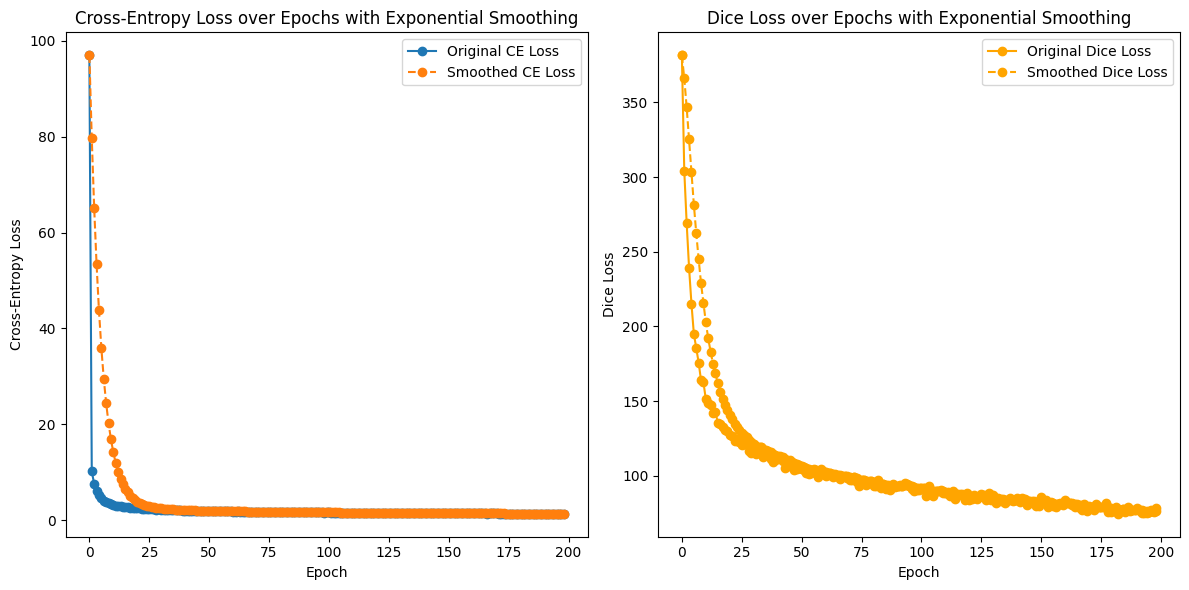

In [6]:
import re
import matplotlib.pyplot as plt

# Read the log file
log_file_path = '/home/manav/SAMed-mod/output/Train2698_3860_1_class/Pleural-Effusion_512_pretrain_vit_b_epo200_bs2_lr0.005/losses.txt'
with open(log_file_path, 'r') as file:
    log_data = file.read()

# Define regular expressions to extract numbers
epoch_pattern = r'Epoch Number (\d+)'
ce_loss_pattern = r'Cross Entropy Loss (\d+\.\d+)'
dice_loss_pattern = r'Dice Loss (\d+\.\d+)'

# Extract numbers using regex
epochs = [int(match.group(1)) for match in re.finditer(epoch_pattern, log_data)]
ce_losses = [float(match.group(1)) for match in re.finditer(ce_loss_pattern, log_data)]
dice_losses = [float(match.group(1)) for match in re.finditer(dice_loss_pattern, log_data)]

# Define exponential smoothing function
def exponential_smoothing(series, alpha):
    smoothed_series = [series[0]]
    for i in range(1, len(series)):
        smoothed_value = alpha * series[i] + (1 - alpha) * smoothed_series[-1]
        smoothed_series.append(smoothed_value)
    return smoothed_series

# Apply exponential smoothing
alpha = 0.2  # Adjust the smoothing factor as needed
ce_smoothed = exponential_smoothing(ce_losses, alpha)
dice_smoothed = exponential_smoothing(dice_losses, alpha)

# Plot the original and smoothed data
plt.figure(figsize=(12, 6))

# Plot Cross-Entropy Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, ce_losses, label='Original CE Loss', marker='o')
plt.plot(epochs, ce_smoothed, label='Smoothed CE Loss', marker='o', linestyle='dashed')
plt.title('Cross-Entropy Loss over Epochs with Exponential Smoothing')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

# Plot Dice Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, dice_losses, label='Original Dice Loss', marker='o', color='orange')
plt.plot(epochs, dice_smoothed, label='Smoothed Dice Loss', marker='o', linestyle='dashed', color='orange')
plt.title('Dice Loss over Epochs with Exponential Smoothing')
plt.xlabel('Epoch')
plt.ylabel('Dice Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
